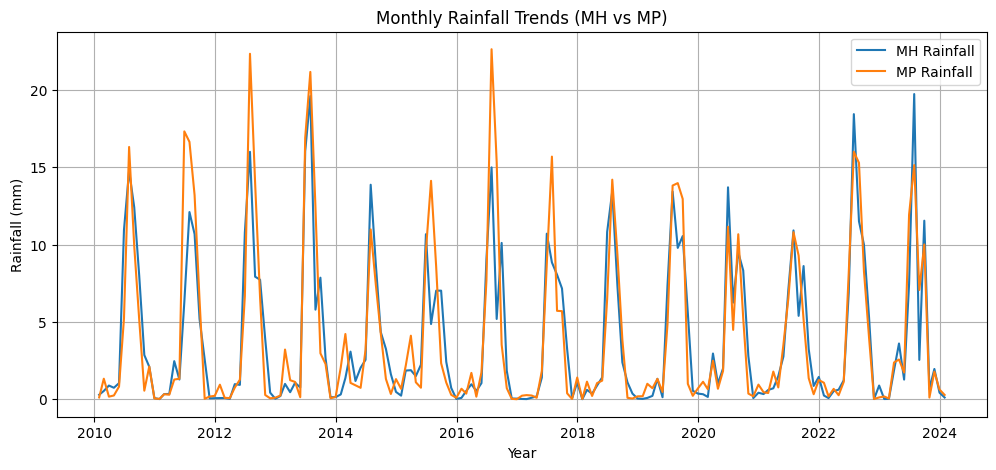

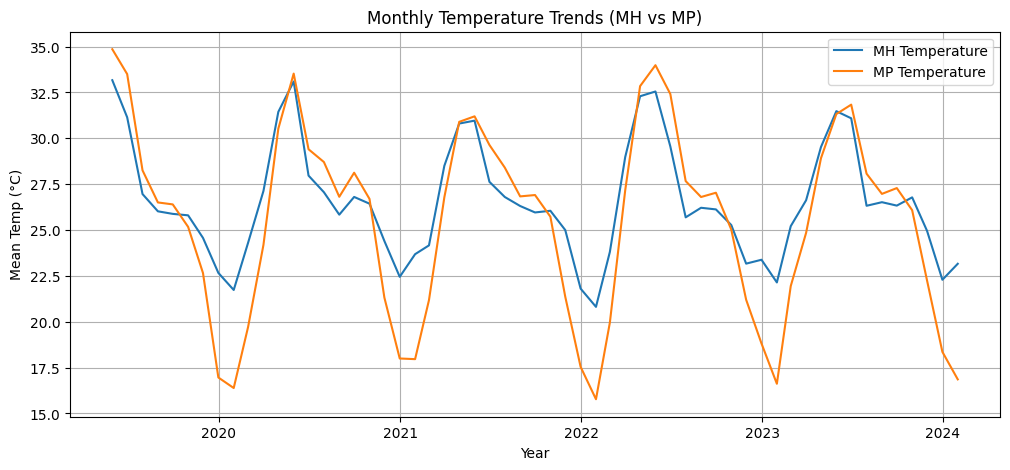

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
# Load datasets (use your own paths)
mh_precip = pd.read_csv("../data/raw/MH_precipitation.csv")
mh_temp = pd.read_csv("../data/raw/MH_temperature.csv")
mp_precip = pd.read_csv("../data/raw/MP_precipitation.csv")
mp_temp = pd.read_csv("../data/raw/MP_temperature.csv")

# Convert date columns to datetime
for df in [mh_precip, mh_temp, mp_precip, mp_temp]:
    df['date'] = pd.to_datetime(df['date'])

# Monthly aggregates
mh_monthly_rain = mh_precip.groupby(pd.Grouper(key='date', freq='ME'))['rainfall_mm'].mean()
mp_monthly_rain = mp_precip.groupby(pd.Grouper(key='date', freq='ME'))['rainfall_mm'].mean()

mh_monthly_temp = mh_temp.groupby(pd.Grouper(key='date', freq='ME'))['mean'].mean()
mp_monthly_temp = mp_temp.groupby(pd.Grouper(key='date', freq='ME'))['mean'].mean()

# Plot Rainfall Trends
plt.figure(figsize=(12,5))
plt.plot(mh_monthly_rain.index, mh_monthly_rain, label="MH Rainfall")
plt.plot(mp_monthly_rain.index, mp_monthly_rain, label="MP Rainfall")
plt.title("Monthly Rainfall Trends (MH vs MP)")
plt.xlabel("Year"); plt.ylabel("Rainfall (mm)")
plt.legend(); plt.grid(True)
plt.show()

# Plot Temperature Trends
plt.figure(figsize=(12,5))
plt.plot(mh_monthly_temp.index, mh_monthly_temp, label="MH Temperature")
plt.plot(mp_monthly_temp.index, mp_monthly_temp, label="MP Temperature")
plt.title("Monthly Temperature Trends (MH vs MP)")
plt.xlabel("Year"); plt.ylabel("Mean Temp (°C)")
plt.legend(); plt.grid(True)
plt.show()